In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("/Users/c24102394/Desktop/PA-symptomology/Experiments/Per-day-prediction /grid_results_horizons/mlp/h1/mlp_best_epoch_logs.csv")

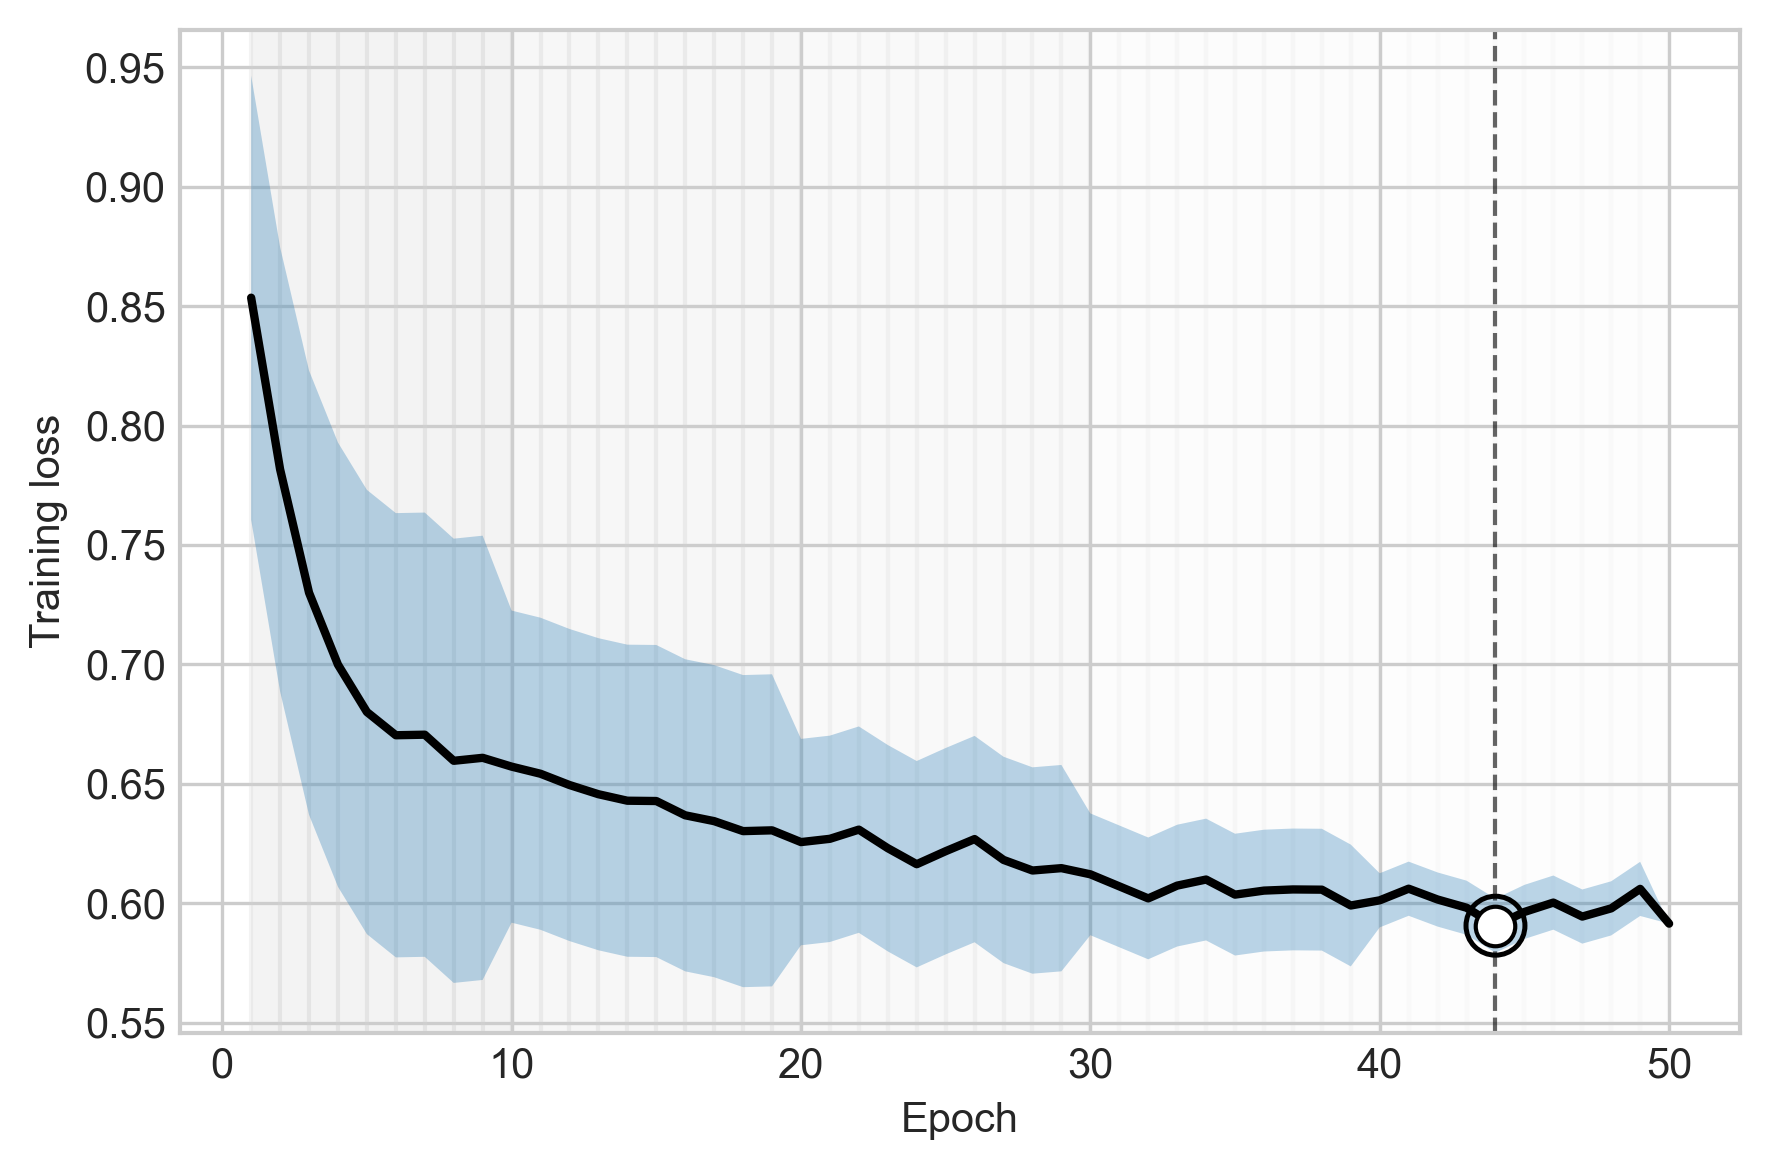

In [8]:
epoch = df["epoch"].values
loss = df["train_loss"].values
lr = df["lr"].values

min_idx = np.argmin(loss)
min_ep = epoch[min_idx]
min_loss = loss[min_idx]

lr_norm = (lr - lr.min()) / (lr.max() - lr.min() + 1e-8)
sd = lr_norm * 0.15 * np.median(loss)
upper = loss + sd
lower = np.clip(loss - sd, a_min=0, a_max=None)

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

for i in range(len(epoch) - 1):
    ax.axvspan(epoch[i], epoch[i + 1], alpha=lr_norm[i] * 0.25, color="lightgray")

ax.fill_between(epoch, lower, upper, alpha=0.3)
ax.plot(epoch, loss, linewidth=2, color="black")

ax.scatter(min_ep, min_loss, s=90, color="white", edgecolor="black", zorder=4)
ax.scatter(min_ep, min_loss, s=200, facecolors="none", edgecolors="black", linewidth=1.2, zorder=3)
ax.axvline(min_ep, linestyle="--", linewidth=1, color="black", alpha=0.6)

ax.set_xlabel("Epoch")
ax.set_ylabel("Training loss")

fig.tight_layout()
plt.savefig("epoch_curve.png", bbox_inches="tight")
plt.show()